# Bagging and random forest

In [112]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [113]:
def write_answer(*answers, task_number=None):
    filename = f'task{task_number}.txt' if task_number else 'task.txt'
    with open(filename, 'w') as f:
        f.write(' '.join([str(ans) for ans in answers]))

Загрузите датасет `digits` с помощью функции `load_digits` из `sklearn.datasets` и подготовьте матрицу признаков `X` и ответы на обучающей выборке `y`

In [114]:
digits = load_digits()
X, y = digits.data, digits.target
X.shape

(1797, 64)

## Task 1\.
Создайте `DecisionTreeClassifier` с настройками по умолчанию и измерьте качество его работы с помощью `cross_val_score`. Эта величина и будет ответом в пункте `1`.

In [115]:
tree_classifier = DecisionTreeClassifier(random_state=0)

In [116]:
scores = cross_val_score(tree_classifier, X, y, cv=10)
scores.mean()

0.8303337234738853

In [117]:
write_answer(scores.mean(), task_number=1)

## Task 2\. 

Воспользуйтесь `BaggingClassifier` из `sklearn.ensemble`, чтобы обучить бэггинг над `DecisionTreeClassifier`. Используйте в `BaggingClassifier` параметры по умолчанию, задав только количество деревьев равным `100`.

Качество классификации новой модели – ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [118]:
bagging_classifier = BaggingClassifier(tree_classifier, n_estimators=100, random_state=0)
bagging_scores = cross_val_score(bagging_classifier, X, y, cv=10)
bagging_scores.mean()

0.9243136920825039

In [119]:
write_answer(bagging_scores.mean(), task_number=2)

## Task 3\. 
Теперь изучите параметры `BaggingClassifier` и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt d$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. 

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [120]:
max_features = int(X.shape[1]**0.5)
rand_bagging_classifier = BaggingClassifier(tree_classifier, n_estimators=100, max_features=max_features, random_state=0)
rand_bagging_scores = cross_val_score(rand_bagging_classifier, X, y, cv=10)
rand_bagging_scores.mean()

0.9365281294303756

In [121]:
write_answer(rand_bagging_scores.mean(), task_number=3)

## Task 4\. 
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в `BaggingClassifier` и добавить его в `DecisionTreeClassifier`. Какой параметр за это отвечает, можно понять из документации `sklearn`, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt d$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [122]:
tree_classifier = DecisionTreeClassifier(max_features=max_features)
bagging_classifier = BaggingClassifier(tree_classifier, n_estimators=100, random_state=0)
bagging_scores = cross_val_score(bagging_classifier, X, y, cv=10)
bagging_scores.mean()

0.9544773623165452

In [123]:
write_answer(bagging_scores.mean(), task_number=4)

## Task 5\. 

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с `RandomForestClassifier` из `sklearn.ensemble`. 

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [124]:
forest_classifier = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=0)
forest_scores = cross_val_score(forest_classifier, X, y, cv=10)
forest_scores.mean()

0.9506154156838471

In [125]:
n_estimators = range(5, 80, 10)
n_features = range(5, 65, 10)
n_depth = range(5, 80, 10)

In [126]:
scores_e = [cross_val_score(forest_classifier.set_params(n_estimators=n), X, y, cv=10).mean() for n in n_estimators]
scores_f = [cross_val_score(forest_classifier.set_params(max_features=n), X, y, cv=10).mean() for n in n_features]
forest_classifier.max_features=max_features
scores_d = [cross_val_score(forest_classifier.set_params(max_depth=n), X, y, cv=10).mean() for n in n_depth]

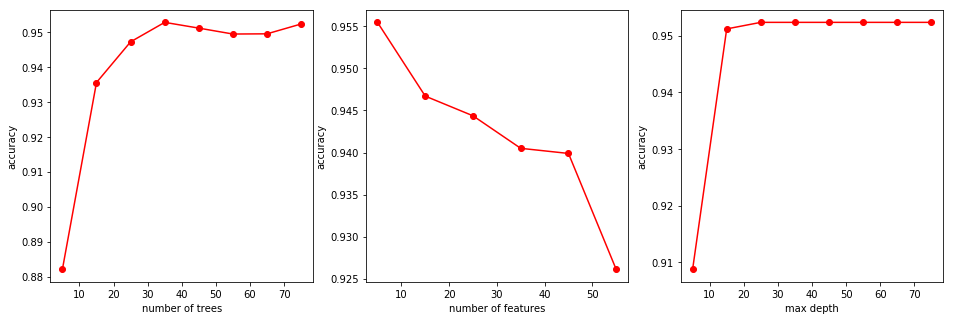

In [127]:
plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 3, 1)
ax1.plot(n_estimators, scores_e, 'r-', marker='o')
ax1.set_xlabel('number of trees')
ax1.set_ylabel('accuracy')

ax2 = plt.subplot(1, 3, 2)
ax2.plot(n_features, scores_f, 'r-', marker='o')
ax2.set_xlabel('number of features')
ax2.set_ylabel('accuracy')

ax3 = plt.subplot(1, 3, 3)
ax3.plot(n_depth, scores_d, 'r-', marker='o')
ax3.set_xlabel('max depth')
ax3.set_ylabel('accuracy')
plt.show()

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1. Случайный лес сильно переобучается с ростом количества деревьев
2. При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
3. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
4. При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
5. При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
6. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
7. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг друга).

In [129]:
write_answer(*[2, 3, 4, 7], task_number=5)